## Load Data

In [2]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
print(train_data.shape)
print(test_data.shape)

print("Train Data : ")
print(train_data.head(3))

print("Test Data : ")
print(test_data.head(3))

(90615, 10)
(60411, 9)
Train Data : 
   id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F    0.55      0.43   0.150        0.7715          0.3285   
1   1   F    0.63      0.49   0.145        1.1300          0.4580   
2   2   I    0.16      0.11   0.025        0.0210          0.0055   

   Whole weight.2  Shell weight  Rings  
0          0.1465         0.240     11  
1          0.2765         0.320     11  
2          0.0030         0.005      6  
Test Data : 
      id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   

   Whole weight.2  Shell weight  
0          0.3125        0.3005  
1          0.2195        0.2750  
2          0.1845        0.2405  


## Plot

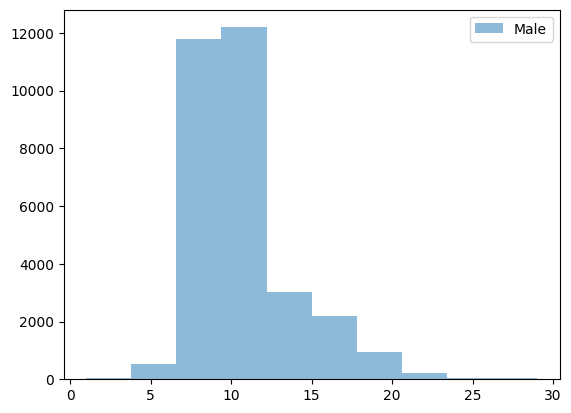

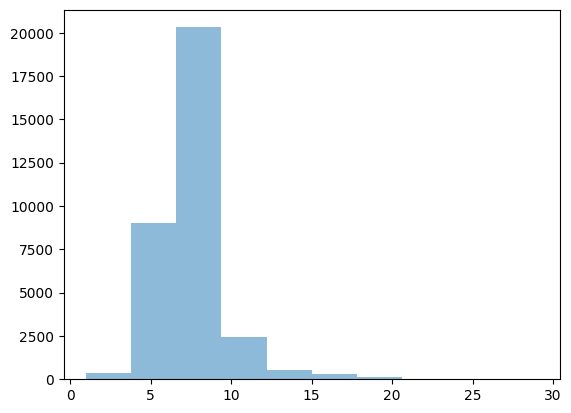

In [4]:
import matplotlib.pyplot as plt

plt.hist(train_data[train_data['Sex'] == 'M']['Rings'], alpha=0.5, label='Male')
plt.legend()
plt.show()

plt.clf()
plt.hist(train_data[train_data['Sex'] == 'I']['Rings'], alpha=0.5, label='Female')
plt.show()

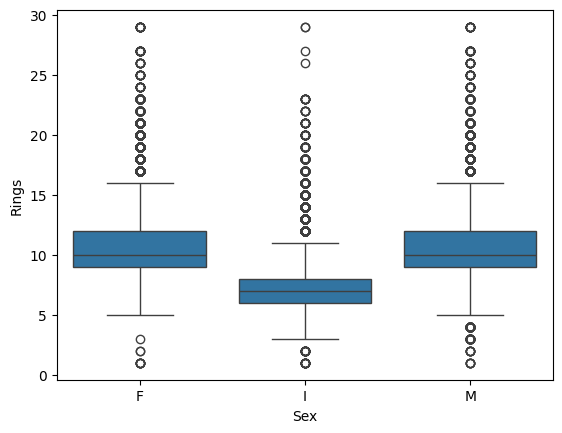

In [5]:
import seaborn as sns

sns.boxplot(x='Sex', y='Rings', data=train_data)
plt.show()

## Random Forest

In [6]:
train_data.head(1)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.55,0.43,0.15,0.7715,0.3285,0.1465,0.24,11


In [7]:
X = train_data[['Sex', 'Length', 'Diameter', 'Whole weight', 
    'Whole weight.1', 'Whole weight.2', 'Shell weight', ]]
X = pd.get_dummies(X)

y = train_data["Rings"]

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=1, max_depth = 6)

model.fit(X, y)

RandomForestClassifier(max_depth=6, random_state=1)

In [9]:
test_data.head(1)
X.head(1)

,Length,Diameter,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_I,Sex_M
0,0.55,0.43,0.7715,0.3285,0.1465,0.24,True,False,False


In [11]:
X_test = test_data[['Sex', 'Length', 'Diameter', 'Whole weight', 
    'Whole weight.1', 'Whole weight.2', 'Shell weight', ]]
X_test = pd.get_dummies(X_test)

predictions = model.predict(X_test)

output = pd.DataFrame({'id': test_data.id, 'Rings': predictions})
output.to_csv('submission_lightgbm_3.csv', index=False)